In [1]:
# Import Tensorflow 2.0
import tensorflow as tf 
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models
(X_train, Y_train), (X_test, Y_test) = mnist.load_data() #Y : name of the number ; X : picture of that number in 28x28

In [2]:
#%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
X_train = X_train/255.0
X_test = X_test/255.0
X_train = tf.expand_dims(X_train, -1)
X_test = tf.expand_dims(X_test, -1)
print(tf.shape(X_train))

tf.Tensor([60000    28    28     1], shape=(4,), dtype=int32)


In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (4, 4), strides = 1, activation='relu', input_shape=(28, 28,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                102464    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

In [5]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=10, 
                    validation_data=(X_test, Y_test))

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1360 - accuracy: 0.9583 - val_loss: 0.0437 - val_accuracy: 0.9851
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0448 - accuracy: 0.9862 - val_loss: 0.0290 - val_accuracy: 0.9898
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0324 - accuracy: 0.9899 - val_loss: 0.0394 - val_accuracy: 0.9871
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0232 - accuracy: 0.9925 - val_loss: 0.0264 - val_accuracy: 0.9910
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0179 - accuracy: 0.9939 - val_loss: 0.0265 - val_accuracy: 0.9921
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0132 - accuracy: 0.9957 - val_loss: 0.0255 - val_accuracy: 0.9916
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0116 - accuracy: 0.9962 - val_loss: 0.0329 - val_accuracy:

prediction:3


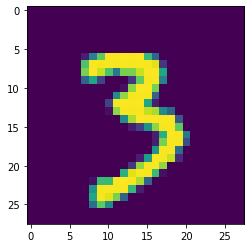

In [6]:
  import numpy as np
  data = tf.expand_dims(X_test[30], 0)
  prediction = model.predict(data)

  if np.argmax(prediction[0]) == Y_test[30]:
    no = str(Y_test[30])
    img = tf.squeeze(X_test[30], [2])
    imgplot = plt.imshow(img)
    print(f'prediction:{no}')
  else:
    print('cannot do')
  
